In [1]:
#Importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [2]:
#Summary of the Data frame
df = pd.read_csv('T1_A24census4.csv')
df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,James Close,Bethany,Morgan,37,Head,Divorced,Female,Customer service manager,NaN,No Religion
1,1,James Close,Trevor,Sharp,31,Lodger,Widowed,Male,Theatre manager,NaN,Christian
2,1,James Close,Harriet,Green,49,Lodger,Single,Female,Sport and exercise psychologist,NaN,No Religion
3,2,James Close,Karl,Thompson,44,Head,Single,Male,Corporate investment banker,NaN,Christian
4,2,James Close,Lewis,Thompson,12,Son,NaN,Male,Student,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7553,1,Lisbon Farm,Jodie,Johnson,37,Head,Divorced,Female,Politician's assistant,NaN,Christian
7554,1,Lisbon Farm,Lorraine,Johnson,7,Daughter,NaN,Female,Student,NaN,NaN
7555,1,Lisbon Farm,Liam,Johnson,2,Son,NaN,Male,Child,NaN,NaN
7556,1,Lisbon Farm,Angela,Hussain,39,Visitor,Divorced,Female,"Engineer, petroleum",NaN,The Templars


In [3]:
# Identify missing values in the data.
df.isna().sum()

House Number                        0
Street                              0
First Name                          0
Surname                            12
Age                                 0
Relationship to Head of House     483
Marital Status                   1571
Gender                              0
Occupation                          0
Infirmity                        7463
Religion                          851
dtype: int64

The "Surname", "Relationship to Head of House", "Marital Status", "Infirmity" and "Religion" columns contain some missing values.

In [4]:
#Looking out for duplicate values in the data
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7553    False
7554    False
7555    False
7556    False
7557    False
Length: 7558, dtype: bool

There are no duplicated values in the dataset

In [7]:
#Checking the data types for each column
df.dtypes

House Number                      int64
Street                           object
First Name                       object
Surname                          object
Age                               int64
Relationship to Head of House    object
Marital Status                   object
Gender                           object
Occupation                       object
Infirmity                        object
Religion                         object
dtype: object

## Cleaning the Religion colummn


In [10]:
# Looking out for unique values in the Religion column.
df['Religion'].unique()

array(['No Religion', 'Christian', nan, 'Sikh', 'The Circle of Magi',
       'Muslim', 'Hindu', 'Greek', 'Dark Brotherhood', 'Bahai',
       'The Templars'], dtype=object)

In [11]:
#Checking for null values in the Religion column.
df['Religion'].isnull().sum()

851

In [12]:
#A function to fill the missing values in the 'Religion' column.
def fill_missing_religion(row, group_data):
    # Check if the 'Religion' value is missing for the current row
    if pd.isna(row['Religion']):
        # Get the group matching the current row
        house_group = group_data.get_group((row['House Number'], row['Street']))
        # Find the first non-null value in the 'Religion' column of the group
        non_null_religion = house_group['Religion'].dropna().unique()
        if len(non_null_religion) == 1:
            return non_null_religion[0]
        else:
            return "unknown"# Return the first non-null religion
    else:
        return row['Religion']  # If no match, return the original value

group_data = df.groupby(['House Number', 'Street'])

# Apply the 'fill_missing_religion' function to fill in missing 'Religion' values
df['Religion'] = df.apply(lambda row: fill_missing_religion(row, group_data), axis=1)

In [13]:
# Replacing some fake Religions in the data.
# Replace 'Dark Brotherhood' with 'unknown'
df['Religion']= df['Religion'].replace ('Dark Brotherhood', 'unknown')
# Replace 'Bahai' with 'unknown'
df['Religion']= df['Religion'].replace ('Bahai', 'unknown')
# Replace 'The Templars' with 'Christian'
df['Religion']= df['Religion'].replace ('The Templars', 'Christian')
# Replace 'The Circle of Magi' with 'unknown'
df['Religion']= df['Religion'].replace ('The Circle of Magi', 'unknown')
# Replace 'Greek' with 'unknown'
df['Religion']= df['Religion'].replace ('Greek', 'unknown')

In [14]:
df['Religion']

0       No Religion
1         Christian
2       No Religion
3         Christian
4         Christian
           ...     
7553      Christian
7554        unknown
7555        unknown
7556      Christian
7557    No Religion
Name: Religion, Length: 7558, dtype: object

In [16]:
#Checking the unique values in the Religion column again
df['Religion'].unique()

array(['No Religion', 'Christian', 'Sikh', 'unknown', 'Muslim', 'Hindu'],
      dtype=object)

In [17]:
# Counting the number of people in each religion
religion_count = df['Religion'].value_counts()
religion_count

Religion
Christian      3903
No Religion    3294
unknown         154
Muslim          113
Hindu            65
Sikh             29
Name: count, dtype: int64

In [18]:
#Checking for null values in only the Religion column.
df['Religion'].isnull().sum()

0

The Religion column is clean now.

## Cleaning the "Marital Status" column

In [19]:
# Finding the number of total missing values in the columns.
df.isna().sum()

House Number                        0
Street                              0
First Name                          0
Surname                            12
Age                                 0
Relationship to Head of House     483
Marital Status                   1571
Gender                              0
Occupation                          0
Infirmity                        7463
Religion                            0
dtype: int64

In [20]:
#Checking out for unique values in the Marital Status column
df ['Marital Status'].unique()

array(['Divorced', 'Widowed', 'Single', nan, 'Married'], dtype=object)

In [22]:
#Identify missing values in the "Marital Status" column
df['Marital Status'].isna().sum()

1571

In [23]:
#Filter the data with missing values in the "Marital Status" column
filtered_df = df[df['Marital Status'].isna()]
filtered_df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4,2,James Close,Lewis,Thompson,12,Son,NaN,Male,Student,NaN,Christian
5,2,James Close,Bethany,Thompson,12,Adopted Daughter,NaN,Female,Student,NaN,Christian
6,2,James Close,Paula,Thompson,6,Daughter,NaN,Female,Student,NaN,Christian
26,9,James Close,Jack,North,5,Son,NaN,Male,Student,NaN,Sikh
33,12,James Close,Richard,Jackson,11,Son,NaN,Male,Student,NaN,unknown
...,...,...,...,...,...,...,...,...,...,...,...
7550,1,Victoria Warehouse,Samantha,Bolton,4,Niece,NaN,Female,Child,NaN,Christian
7551,1,Victoria Warehouse,Darren,Bolton,4,Nephew,NaN,Male,Child,NaN,Christian
7552,1,Victoria Warehouse,Heather,Bolton,1,Niece,NaN,Female,Child,NaN,Christian
7554,1,Lisbon Farm,Lorraine,Johnson,7,Daughter,NaN,Female,Student,NaN,unknown


In [24]:
#Checking the Marital status of individuals below 18.
df.loc[df['Age'] < 18, 'Marital Status'].isna().sum()

1571

From the data, all the misssing values in the "Marital Status" column are individuals below age 18 which is expected.

In [19]:
# Checking the Dataframe for rows where the 'Age' is less than 18 and 'Marital Status' is "Married", "Divorced", "Widowed", "Single"
df[(df['Age'] < 18) & (df['Marital Status'].isin(["Married", "Divorced", "Widowed", "Single"]))]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
23,8,James Close,Neil,Ahmed,8,Son,Married,Male,Student,NaN,No Religion
84,8,Westminster Port,Simon,Holt,16,Son,Married,Male,Student,NaN,No Religion
124,24,Westminster Port,Barbara,Ross,0,Daughter,Married,Female,Child,NaN,No Religion
630,73,Aquarius Drive,Emily,Young,2,Adopted Daughter,Married,Female,Child,NaN,No Religion
753,11,Dickinson Course,Amber,Rees,1,Daughter,Single,Female,Child,NaN,No Religion
996,12,Southdeal Lane,Nathan,Scott,3,Son,Married,Male,Child,NaN,No Religion
1022,30,Southdeal Lane,Jordan,Roberts,0,Head,Single,Male,Child,NaN,unknown
1121,97,Southdeal Lane,Marc,Talbot,6,Head,Single,Male,Student,NaN,unknown
1159,120,Southdeal Lane,Tracey,May,4,Daughter,Single,Female,Child,NaN,Christian
1188,138,Southdeal Lane,Louise,Khan,0,Head,Divorced,Female,Child,NaN,unknown


Notice that there are minors who are either "Married", "Divorced", "Widowed", "Single" in the dataset hence need to be replaced with NAN

In [20]:
#Replacing the minors who are either "Married","Divorced", "Widowed", "Single" with "N/A" in the dataset
df.loc[df['Age'] < 18, 'Marital Status'] = np.nan

In [21]:
#Checking the Dataframe for rows where the 'Age' is less than 18 and 'Marital Status' is "Married", "Divorced", "Widowed", "Single"
df[(df['Age'] < 18) & (df['Marital Status'].isin(["Married", "Divorced", "Widowed", "Single"]))]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


The Marital Status column is good now as expected.

In [22]:
# Finding the number of total missing values in the columns.
df.isna().sum()

House Number                        0
Street                              0
First Name                          0
Surname                            12
Age                                 0
Relationship to Head of House     483
Marital Status                   1614
Gender                              0
Occupation                          0
Infirmity                        7463
Religion                            0
dtype: int64

## Cleaning the "Surname" Column

In [23]:
#Looking out missing values in the "Surname" column
df['Surname'].isnull().sum()

12

In [24]:
#view of the data with missing "Surname"
df[df['Surname'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
800,31,Dickinson Course,Leonard,NaN,39,Husband,Married,Male,Data processing manager,NaN,No Religion
1253,175,Southdeal Lane,Patrick,NaN,41,Husband,Married,Male,"Engineer, energy",NaN,No Religion
3928,25,Wilson Ville,Glenn,NaN,49,Husband,Married,Male,Publishing copy,NaN,Christian
4221,12,Thomas Knoll,Gareth,NaN,34,Husband,Married,Male,Sales promotion account executive,NaN,No Religion
4588,33,Tannery Lane,Reece,NaN,80,Husband,Married,Male,Retired Audiological scientist,NaN,No Religion
4730,21,Preston Crescent,Jake,NaN,55,Husband,Married,Male,Holiday representative,NaN,Christian
4773,33,Preston Crescent,Stewart,NaN,40,Husband,Married,Male,Unemployed,NaN,No Religion
5080,46,Turner Road,Kathleen,NaN,95,Wife,Married,Female,Retired Medical laboratory scientific officer,NaN,No Religion
5156,72,Turner Road,Garry,NaN,20,Husband,Married,Male,University Student,NaN,No Religion
5697,26,Wilson Ports,Stewart,NaN,38,Husband,Married,Male,Leisure centre manager,NaN,No Religion


In [25]:
#A function to fill missing values in the 'Surname' column.
def fill_missing_surname(row, group_data):
    # Check if the 'Surname' value is missing for the current row
    if pd.isna(row['Surname']):
        # Get the group matching the current row
        house_group = group_data.get_group((row['House Number'], row['Street']))
        # Find the first non-null value in the 'Surname' column of the group
        non_null_surname = house_group['Surname'].dropna().unique()
        if len(non_null_surname) == 1:
            return non_null_surname[0]
        else:
            return "unknown"# Return the first non-null surname
    else:
        return row['Surname']  # If no match, return the original value

group_data = df.groupby(['House Number', 'Street'])

# Apply the 'fill_missing_religion' function to fill in missing 'Religion' values
df['Surname'] = df.apply(lambda row: fill_missing_surname(row, group_data), axis=1)

In [26]:
#Checking for null values in the "Surname" column.
df['Surname'].isnull().sum()

0

The "Surname" Column is clean now

In [27]:
# Finding the number of total missing values in the columns.
df.isna().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House     483
Marital Status                   1614
Gender                              0
Occupation                          0
Infirmity                        7463
Religion                            0
dtype: int64

# Handling the Infirmity Column

In [28]:
#droping the "Infirmity" column
df.drop(columns = "Infirmity")

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Religion
0,1,James Close,Bethany,Morgan,37,Head,Divorced,Female,Customer service manager,No Religion
1,1,James Close,Trevor,Sharp,31,Lodger,Widowed,Male,Theatre manager,Christian
2,1,James Close,Harriet,Green,49,Lodger,Single,Female,Sport and exercise psychologist,No Religion
3,2,James Close,Karl,Thompson,44,Head,Single,Male,Corporate investment banker,Christian
4,2,James Close,Lewis,Thompson,12,Son,NaN,Male,Student,Christian
...,...,...,...,...,...,...,...,...,...,...
7553,1,Lisbon Farm,Jodie,Johnson,37,Head,Divorced,Female,Politician's assistant,Christian
7554,1,Lisbon Farm,Lorraine,Johnson,7,Daughter,NaN,Female,Student,unknown
7555,1,Lisbon Farm,Liam,Johnson,2,Son,NaN,Male,Child,unknown
7556,1,Lisbon Farm,Angela,Hussain,39,Visitor,Divorced,Female,"Engineer, petroleum",Christian


The infirmity columns is dropped because it will not be useful in the analysis.

## Analysis on the Age Distribution of the Data.

C:\Program Files\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Program Files\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


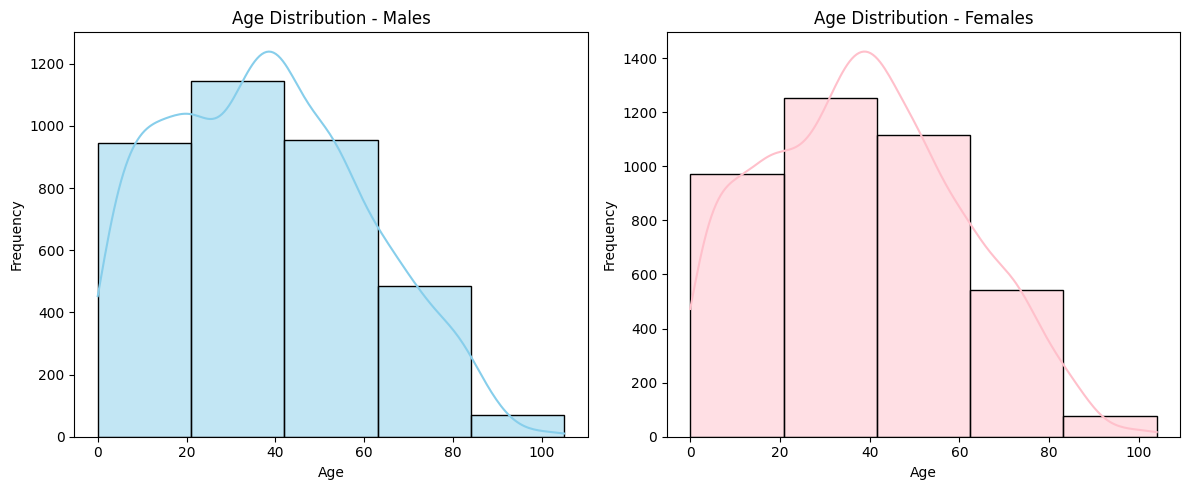

<Figure size 640x480 with 0 Axes>

In [29]:
# Plot male and female histograms side by side
plt.figure(figsize=(12, 5))

# Male histogram
plt.subplot(1, 2, 1)
sns.histplot(data=df[df["Gender"] == "Male"], x="Age", bins=5, kde=True, color="skyblue", edgecolor="black")
plt.title("Age Distribution - Males")
plt.xlabel("Age")
plt.ylabel("Frequency")


# Female histogram
plt.subplot(1, 2, 2)
sns.histplot(data=df[df["Gender"] == "Female"], x="Age", bins=5, kde=True, color="pink", edgecolor="black")
plt.title("Age Distribution - Females")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
plt.savefig("Age Distribution")

## Age Pyramid of the population

In [30]:
# Read Census data
df = pd.read_csv('T1_A24census4.csv')

In [31]:
#grouping the male_age_counts
male_age_counts = df[df['Gender'] == 'Male']['Age'].value_counts()
age_groups = male_age_counts.index // 10 * 10
male_grouped_counts = male_age_counts.groupby(age_groups).sum()
male_grouped_counts = male_grouped_counts.sort_index(ascending = False)
male_grouped_counts = list(male_grouped_counts.mul(-1))
male_grouped_counts

[-5, -16, -124, -203, -297, -445, -557, -557, -496, -471, -426]

In [32]:
#grouping the female_age_counts
female_age_counts = df[df['Gender'] == 'Female']['Age'].value_counts()
age_groups = female_age_counts.index // 10 * 10
female_grouped_counts = female_age_counts.groupby(age_groups).sum()
female_grouped_counts = female_grouped_counts.sort_index(ascending = False)
female_grouped_counts = list(female_grouped_counts)
female_grouped_counts

[7, 14, 119, 246, 359, 478, 656, 656, 507, 491, 428]

In [33]:
age_p = pd.DataFrame({'Age': ['100+', '90-99', '80-89', '70-79', '60-69', '50-59', '40-49', '30-39', '20-29', '10-19', '0-9'],
'Male': male_grouped_counts,
'Female': female_grouped_counts})

AgeClass = ['100+', '90-99', '80-89', '70-79', '60-69', '50-59', '40-49', '30-39', '20-29', '10-19', '0-9']


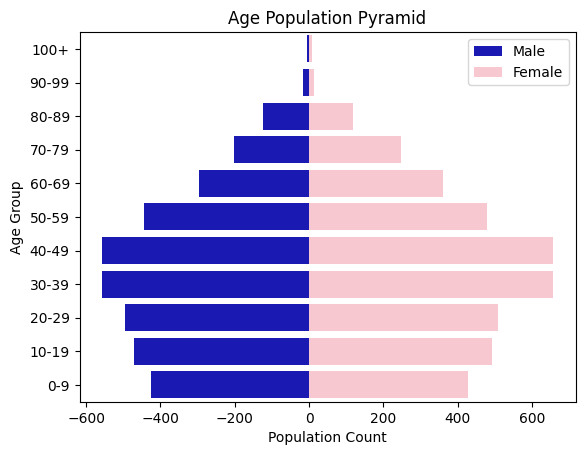

In [34]:
age_pyramid = sns.barplot(x='Male', y='Age', data=age_p,
order=AgeClass, color=('mediumblue'), label='Male')
age_pyramid = sns.barplot(x='Female', y='Age', data=age_p,
order=AgeClass, color=('pink'), label='Female')
age_pyramid.legend()
age_pyramid.set(xlabel='Population Count', ylabel='Age Group')
plt.title('Age Population Pyramid')
plt.savefig("Age Population Pyramid")

## Exploring the "Religion" and "Age" Column

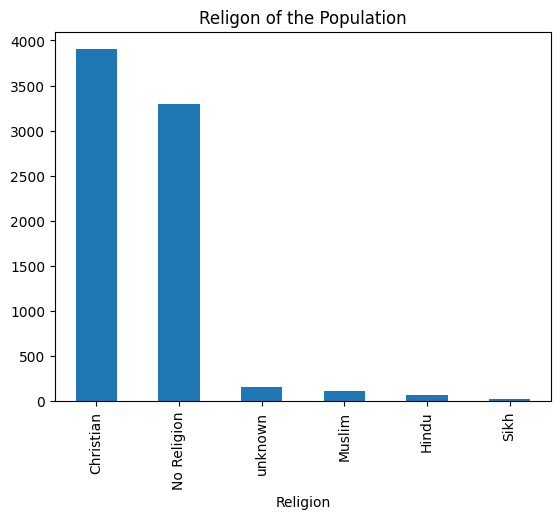

<Figure size 640x480 with 0 Axes>

In [35]:
religion_count.plot(kind = 'bar', title = 'Religon of the Population')

# Show the plot
plt.show()
plt.savefig("Representation of Religion")

In [60]:
# Group by Religion and calculate age range
age_stats = df.groupby('Religion')['Age'].agg(['min', 'max', 'mean']).reset_index()
age_stats.rename(columns={'min': 'Age_Min', 'max': 'Age_Max', 'mean': 'Age_Mean'}, inplace=True)
print(age_stats)

      Religion  Age_Min  Age_Max   Age_Mean
0    Christian        0      105  41.539841
1        Hindu        1       87  27.107692
2       Muslim        0       86  30.778761
3  No Religion        0      104  35.747420
4         Sikh        5       87  43.448276
5      unknown        0       61  11.194805


In [37]:
# Calculate Q1 and Q3
Q1 = np.percentile(df["Age"], 25)
Q3 = np.percentile(df["Age"], 75)

# Calculate IQR
IQR = Q3 - Q1

print("Interquartile Range:", IQR)

Interquartile Range: 34.0


In [61]:
import pandas as pd
from scipy import stats

# Group by Religion and calculate statistics
def calculate_mode(series):
    mode_result = stats.mode(series, keepdims=True)  # Use scipy.stats to calculate mode
    return mode_result.mode[0]  # Return the first mode

age_stats = df.groupby('Religion')['Age'].agg(
    Mean='mean',
    Median='median',
    Mode=calculate_mode
).reset_index()

print(age_stats)

      Religion       Mean  Median  Mode
0    Christian  41.539841    42.0    40
1        Hindu  27.107692    27.0    34
2       Muslim  30.778761    29.0    34
3  No Religion  35.747420    34.0    42
4         Sikh  43.448276    48.0    51
5      unknown  11.194805    11.0    18


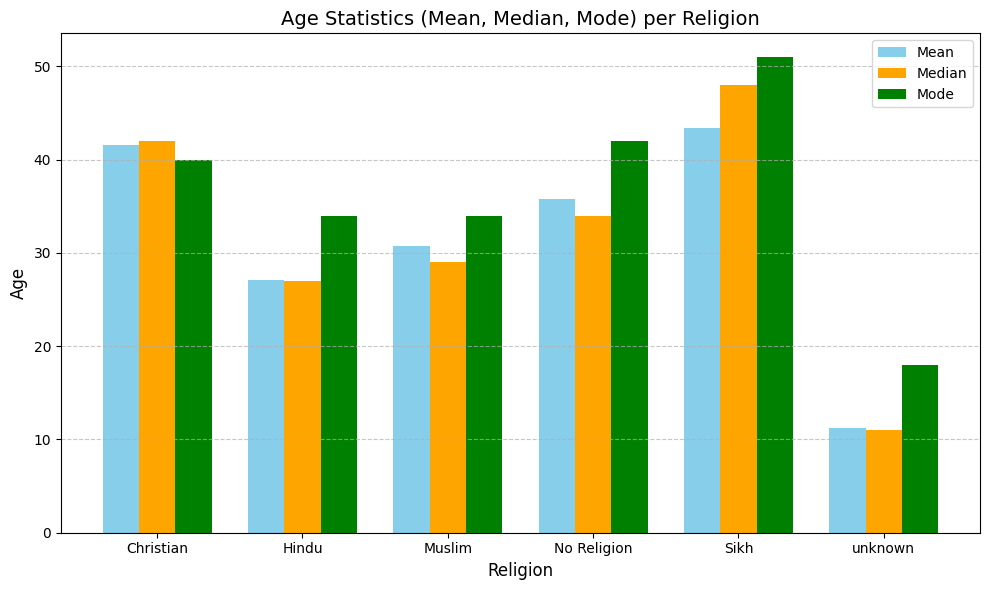

<Figure size 640x480 with 0 Axes>

In [62]:
# Group by Religion and calculate statistics
def calculate_mode(series):
    mode_result = stats.mode(series, keepdims=True)  # Use scipy.stats to calculate mode
    return mode_result.mode[0]  # Return the first mode

age_stats = df.groupby('Religion')['Age'].agg(
    Mean='mean',
    Median='median',
    Mode=calculate_mode
).reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(age_stats['Religion']))  # Religion labels positions
width = 0.25  # Bar width

# Bars for Mean, Median, Mode
ax.bar(x - width, age_stats['Mean'], width, label='Mean', color='skyblue')
ax.bar(x, age_stats['Median'], width, label='Median', color='orange')
ax.bar(x + width, age_stats['Mode'], width, label='Mode', color='green')


# Add labels, title, and legend
ax.set_xlabel('Religion', fontsize=12)
ax.set_ylabel('Age', fontsize=12)
ax.set_title('Age Statistics (Mean, Median, Mode) per Religion', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(age_stats['Religion'], fontsize=10)
ax.legend()

# Show gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
plt.savefig("Age Statistics of Religion")

## Exploring the Birth Rate

In [40]:
# Count the number of children Aged zero
children_aged_zero = df[df['Age'] == 0].shape[0]

# Count the number of Women age between age 25-29
women_aged_25_to_29 = df[(df['Gender'] == 'Female') & (df['Age'] >= 25) & (df['Age'] <= 29)].shape[0]

# Birth rate per 100,000
birth_rate_per_100k = (children_aged_zero / women_aged_25_to_29) * 100000

print(f"Number of children aged zero: {children_aged_zero}")
print(f"Number of Women aged  25-29: {women_aged_25_to_29}")
print(f"Birth rate per 100,000: {birth_rate_per_100k:.2f}")

Number of children aged zero: 65
Number of Women aged  25-29: 268
Birth rate per 100,000: 24253.73


Simplistic Assumptions:

Fertility is not limited to the age group 25–29. The actual fertility window spans a broader range (e.g., 15–49 years). Some women aged 25–29 may already be past childbearing or not have children. Data Quality:

The dataset must accurately categorize age and gender. Missing or misclassified data (e.g., missing age/gender values) could skew results. Birth Attribution:

Births might not be evenly distributed across all childbearing ages, making this estimate inaccurate. Cultural and Regional Variations:

Fertility rates depend on social, economic, and cultural factors that vary widely. Time Lag:

Using data from a single year ignores temporal trends, like declining or increasing fertility rates over time.

## Evolving Birth Rate

In [41]:
# Count the number of children aged four
children_aged_four = df[df['Age'] == 4].shape[0]
# Count the number of Women aged between age 30-34
women_aged_30_to_34 = df[(df['Gender'] == 'Female') & (df['Age'] >= 30) & (df['Age'] <= 34)].shape[0]
# Evolving birth rate per 100,000
evolving_birth_rate_per_100k = (children_aged_four / women_aged_30_to_34) * 100000

print(f"Number of children aged four: {children_aged_four}")
print(f"Number of Women aged  30-34: {women_aged_30_to_34}")
print(f"Evolving birth rate per 100,000:, {evolving_birth_rate_per_100k:.2f}")

Number of children aged four: 91
Number of Women aged  30-34: 307
Evolving birth rate per 100,000:, 29641.69



Age-Specific Fertility Rate Stability:

Assumes women aged 30–34 today had a similar fertility pattern to women aged 25–29 four years ago. Ignores changes in fertility preferences, economic conditions, or societal norms over time. Mortality and Migration:

Assumes negligible mortality or migration for children aged 0–4 and women aged 30–34. Population Completeness:

Relies on the dataset being accurate and complete for all individuals, including ages and genders. Homogeneity Within Age Groups:

Assumes similar fertility behavior within each age group, ignoring variability among subgroups. Four-Year Lag:

Assumes children aged 4 today were primarily born to women aged 25–29 four years ago, without accounting for overlaps or edge cases.

## Death Rate

In [42]:
# Count the number of people aged 56–60
people_56_60 = df[(df['Age'] >= 56) & (df['Age'] <= 60)].shape[0]

# Count the number of people aged 61–65
people_61_65 = df[(df['Age'] >= 61) & (df['Age'] <= 65)].shape[0]

#Difference in deaths between two age groups
deaths = (people_56_60 - people_61_65)  

# Calculate the annual number of deaths over 5 years period
annual_deaths = deaths / 5

# Compute the annual death rate per 100,000
death_rate_per_100k_per_annum = (annual_deaths / people_56_60)* 100000

# Print the results
print("Number of people aged 56–60:", people_56_60)
print("Number of people aged 61–65:", people_61_65)
print("Difference in death between two age groups:", deaths)
print(f"Annual death rate per 100,000: {death_rate_per_100k_per_annum:.2f}")

Number of people aged 56–60: 404
Number of people aged 61–65: 352
Difference in death between two age groups: 52
Annual death rate per 100,000: 2574.26


In [43]:
# Count the number of people aged 71–75
people_71_75 = df[(df['Age'] >= 71) & (df['Age'] <= 75)].shape[0]

# Count the number of people aged 66–70
people_66_70 = df[(df['Age'] >= 66) & (df['Age'] <= 70)].shape[0]
 
#Difference in deaths between two age groups
deaths = (people_66_70 - people_71_75)

# Calculate the annual number of deaths over 5 years period
annual_deaths = deaths / 5

# Compute the annual death rate per 100,000
death_rate_per_100k_per_annum = (annual_deaths / people_66_70) * 100000

# Print the results
print("Number of people aged 71–75:", people_71_75)
print("Number of people aged 66–70:", people_66_70)
print("Difference in death between two age groups:", deaths)
print(f"Annual death rate per 100,000: {death_rate_per_100k_per_annum:.2f}")

Number of people aged 71–75: 254
Number of people aged 66–70: 280
Difference in death between two age groups: 26
Annual death rate per 100,000: 1857.14


In [44]:
# Count the number of people aged 76–79
people_76_79 = df[(df['Age'] >= 76) & (df['Age'] <= 79)].shape[0]

# Count the number of people aged 80–89
people_80_89 = df[(df['Age'] >= 80) & (df['Age'] <= 89)].shape[0]

#Difference in deaths between two age groups
deaths = (people_80_89 - people_76_79)

# Calculate the annual number of deaths over 5 years period
annual_deaths = deaths / 5

# Compute the annual death rate per 100,000
death_rate_per_100k_per_annum = (annual_deaths / people_80_89) * 100000

# Print the results
print("Number of people aged 76–79:", people_76_79)
print("Number of people aged 80–89:", people_80_89)
print("Difference in death between two age groups:", deaths)
print(f"Annual death rate per 100,000: {death_rate_per_100k_per_annum:.2f}")

Number of people aged 76–79: 145
Number of people aged 80–89: 243
Difference in death between two age groups: 98
Annual death rate per 100,000: 8065.84


In [45]:
# Count the number of people aged 90–95
people_90_95 = df[(df['Age'] >= 90) & (df['Age'] <= 95)].shape[0]

# Count the number of people aged 96 and 100+
people_96_100_plus = df[(df['Age'] >= 96) & (df['Age'] >= 100)].shape[0]

#Difference in deaths between two age groups
deaths = (people_90_95 - people_96_100_plus)

# Calculate the annual number of deaths over 5 years period
annual_deaths = deaths / 5

# Compute the annual death rate per 100,000
death_rate_per_100k_per_annum = (annual_deaths / people_90_95) * 100000

# Print the results
print("Number of people aged 91–95:", people_76_79)
print("Number of people aged 96–100+:", people_80_89)
print("Difference in death between two age groups:", deaths)
print(f"Annual death rate per 100,000: {death_rate_per_100k_per_annum:.2f}")

Number of people aged 91–95: 145
Number of people aged 96–100+: 243
Difference in death between two age groups: 8
Annual death rate per 100,000: 8000.00


# Total death rate of people in the aged group of 56-100+


In [46]:
# Sum up the annual death rate per 100,000 of age group of the above 56
# which is calculated above.

total_death_rate = 2574.26 + 1857.14 + 8065.84 + 8000
print(f"Total Death Rate: {total_death_rate:.2f}")

Total Death Rate: 20497.24


The total death rate in the population is 20497.24 per 100,000.00

A death rate of 20,497.27 per 100,000 means that for every 100,000 people in the population, about 20497.24 people are expected to die over a certain period (usually a year). 
This is a way to measure how many people die in that population relative to its size.

## Population growth rate 

In [47]:
pop_growth = birth_rate_per_100k - total_death_rate

print(f"Population growth rate: {pop_growth:.2f}")
#The difference betwenn the birth rate and the death rate

Population growth rate: 3756.49


Due to a positive difference between birth rate and death rate, If the difference between the birth rate and the death rate is positive, 
it means that the birth rate is higher than the death rate. 
This indicates a growing population, as more people are being born than are dying. 
Over time, this can lead to an increase in the overall population size.

## Exploring The Occupation Column

In [48]:
df["Occupation"]

0              Customer service manager
1                       Theatre manager
2       Sport and exercise psychologist
3           Corporate investment banker
4                               Student
                     ...               
7553             Politician's assistant
7554                            Student
7555                              Child
7556                Engineer, petroleum
7557                 University Student
Name: Occupation, Length: 7558, dtype: object

In [49]:
#checking the number of individuals in the various occupations 
for k,v in df['Occupation'].value_counts().items():
    if v > 1:
        print(k, "---->", v)

Student ----> 1290
Unemployed ----> 498
University Student ----> 404
Child ----> 400
Sports administrator ----> 16
Diagnostic radiographer ----> 15
Scientist, research (physical sciences) ----> 15
Hospital pharmacist ----> 15
Designer, ceramics/pottery ----> 14
Forensic scientist ----> 14
Scientist, forensic ----> 14
Surveyor, building control ----> 13
Broadcast presenter ----> 13
Designer, blown glass/stained glass ----> 13
Lexicographer ----> 13
Producer, radio ----> 13
Holiday representative ----> 13
Agricultural consultant ----> 12
Seismic interpreter ----> 12
Banker ----> 12
Physiological scientist ----> 12
Fitness centre manager ----> 12
Lecturer, higher education ----> 12
Mining engineer ----> 12
Set designer ----> 12
Chartered accountant ----> 12
Video editor ----> 11
Building surveyor ----> 11
Immigration officer ----> 11
Press sub ----> 11
Animal nutritionist ----> 11
Administrator, sports ----> 11
Engineer, chemical ----> 11
Scientific laboratory technician ----> 11
Regulato

In [50]:
# Filtering out "University Students", "Students", "Child" 
university_student_count = df[df['Occupation'] == 'University Student'].shape[0] 
student_count = df[df['Occupation'] == 'Student'].shape[0]
child_count = df[df['Occupation'] == 'Child'].shape[0]
print("Number of Univeristiy Students:", university_student_count)
print("Number of Students:", student_count)
print("Number of Children:", child_count)

Number of Univeristiy Students: 404
Number of Students: 1290
Number of Children: 400


In [51]:
# Filter out "Unemployed", "Student", "University Student", "Child" from the Occupation column
filtered_occupation = df[~df["Occupation"].isin(["Unemployed", "Student", "University Student", "Child"])].shape[0]

# Display the number of people who are working including pensioners
print(f"The number of workers including pensioners are: {filtered_occupation}")

The number of workers including pensioners are: 4966


In [52]:
#Filter out the number of retired indivduals
retired_occupations = len(df[df["Occupation"].str.startswith("Retired", na=False)])

print(f"The number of Individuals on retirement are: {retired_occupations}")

The number of Individuals on retirement are: 820


In [53]:
active_workers = filtered_occupation - retired_occupations
print(f"Active Workers in the population are:{active_workers}")

Active Workers in the population are:4146


In [54]:
# Group and count the 'Unemployed' values 
unemployed_count = df[df['Occupation'] == 'Unemployed'].shape[0] 
print("Number of Unemployed:", unemployed_count)

Number of Unemployed: 498


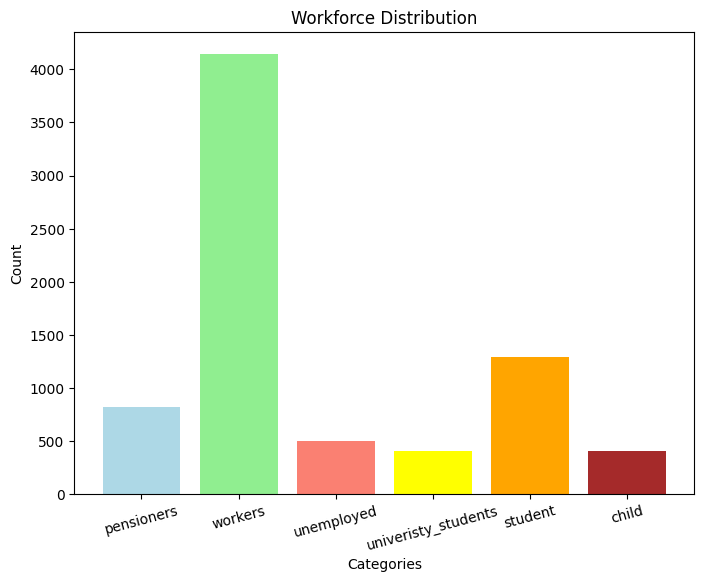

Analysis:
Total Population: 7558
Retired Occupations: 820 (10.8%)
Active Workers: 4146 (54.9%)
Unemployed : 498 (6.6%)
University Students : 404 (5.3%)
Students : 1290 (17.1%)
Children : 400 (5.3%)


<Figure size 640x480 with 0 Axes>

In [55]:

import matplotlib.pyplot as plt

pensioners = retired_occupations
workers = active_workers
unemployed = unemployed_count
univeristy_students = university_student_count
students = student_count
child = child_count

# Data for visualization
categories = ['pensioners', 'workers', 'unemployed', 'univeristy_students', 'student', 'child']
values = [retired_occupations, active_workers, unemployed_count, university_student_count, student_count, child_count]  



# Bar Chart Visualization
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['lightblue', 'lightgreen', 'salmon', 'yellow', 'orange', 'brown'])
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Workforce Distribution')
plt.xticks(rotation=15)
plt.show()
plt.savefig("Workforce Distribution")


# Simple Analysis
total = sum(values)
print("Analysis:")
print(f"Total Population: {total}")
print(f"Retired Occupations: {retired_occupations} ({retired_occupations / total * 100:.1f}%)")
print(f"Active Workers: {active_workers} ({active_workers / total * 100:.1f}%)")
print(f"Unemployed : {unemployed_count} ({unemployed_count / total * 100:.1f}%)")
print(f"University Students : {university_student_count} ({university_student_count / total * 100:.1f}%)")
print(f"Students : {student_count} ({student_count / total * 100:.1f}%)")
print(f"Children : {child_count} ({child_count / total * 100:.1f}%)")